# Introduction to VaR
many CEOs prefer a simple measure called Value at Risk (VaR), which has
the simple definition given here:
"The maximum loss with a confidence level over a predetermined period."
From the preceding definition, it has three explicit factors plus one implied one. The
implied factor or variable is our current position, or the value of our current portfolio
or individual stock(s). The preceding statement offers the maximum possible loss in
the future and this is the first factor. The second one is over a specific time period.
Those two factors are quite common. However, the last factor is quite unique: with a
confidence level or probability. Here are a few examples:
- Example 1: On February 7, 2017, we own 300 shares of International Business Machine's stocks worth 52,911. The maximum loss tomorrow, thatis, February 8, 2017, is  1,951 with a 99% confidence level.
- Example 2: Our mutual fund has a value of 10 million today. The maximum loss over the next 3 months is 0.5 million at a 95% confidence level.
- Example 3: The value of our bank is 200 million. The VaR of our bank is 10m with a 1% probability over the next 6 months.

Usually, there are two methods to estimate a VaR. The first method is based on
the assumption that our security or portfolio returns follow a normal distribution,
while the second method depends on the ranking of the historical returns. Before
discussing the first method, let's review the concepts with respect to a normal
distribution. The density of a normal distribution is defined here:

In [1]:
import scipy.stats as stats
from scipy import sqrt, exp,pi
d1=stats.norm.pdf(0,0.1,0.05)
print("d1=",d1)
d2=1/sqrt(2*pi*0.05**2)*exp(-(0-0.1)**2/0.05**2/2) # verify manually
print("d2=",d2)

d1= 1.079819330263761
d2= 1.079819330263761


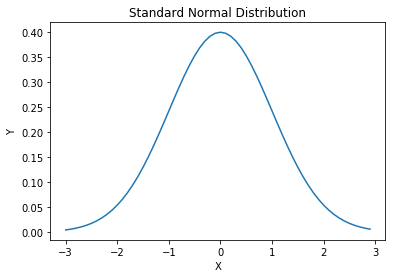

In [3]:
import scipy as sp
import matplotlib.pyplot as plt
x = sp.arange(-3,3,0.1)
y=sp.stats.norm.pdf(x)
plt.title("Standard Normal Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y)
plt.show()

For the VaR estimation, usually we would choose two confidence levels of 95%
and 99%. For the 95% (99%) confidence level, we actually look at the left tail with a
5% (1%) probability. The following graph illustrates the concept of VaR based on a
standard normal distribution with a 95% confidence level:

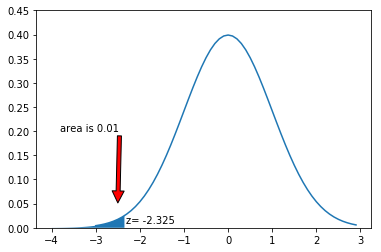

In [5]:
import scipy as sp
from matplotlib import pyplot as plt
z=-2.325 # user can change this number
xStart=-3.8 # arrow line start x
yStart=0.2 # arrow line start x
xEnd=-2.5 # arrow line start x
yEnd=0.05 # arrow line start x
def f(t):
    return sp.stats.norm.pdf(t)
plt.ylim(0,0.45)
x = sp.arange(-3,3,0.1)
y1=f(x)
plt.plot(x,y1)
x2= sp.arange(-4,z,1/40.)
sum=0
delta=0.05
s=sp.arange(-10,z,delta)
for i in s:
    sum+=f(i)*delta
plt.annotate('area is '+str(round(sum,4)),xy=(xEnd,yEnd),xytext=(xStart,yStart), arrowprops=dict(facecolor='red',shrink=0.01))
plt.annotate('z= '+str(z),xy=(z,0.01))
plt.fill_between(x2,f(x2))
plt.show()

Based on the assumption of normality, we have the following general form to
estimate VaR:
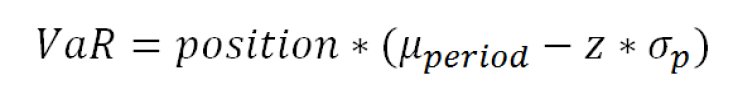

Here, VaR is our value at risk, position is the current market value of our portfolio,
μperiod is the expected period return, z is a cut-off point depending on the confidence
level, and σ is the volatility of our portfolio. For a normal distribution, z=2.33 for
a 99% confidence level, and z=1.64 for a 95% confidence level. Since we could use
scipy.stats.norm.ppf() to get the z value, the preceding equation could be
rewritten as follows:
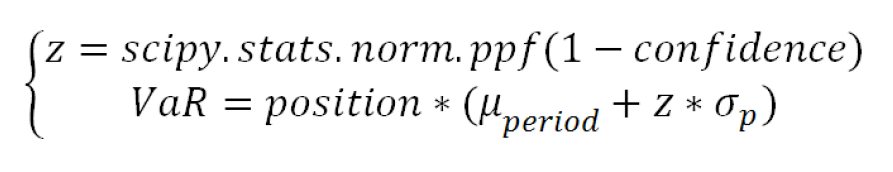

For the preceding equation, it has a positive sign
instead of the negative one shown in the previous equation. The reason is that the z
value estimated by applying scipy.stats.norm.ppf() would be negative; see the
following code:

In [6]:
from scipy.stats import norm
confidence_level=0.99
z=norm.ppf(1-confidence_level)
print(z)

-2.3263478740408408


When the time period is short, such as 1 day, we could ignore the impact of μperiod.
Therefore, we have the following simplest form:
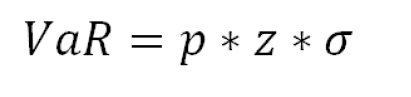

The following program shows the 5% VaR of a hypothetical profit-and-loss
probability density function:

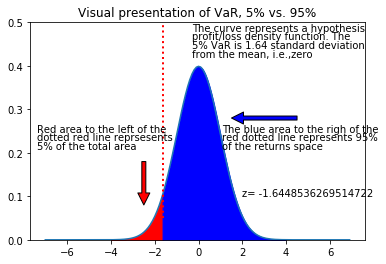

In [9]:
import scipy as sp
import scipy as sp
from scipy.stats import norm
from matplotlib import pyplot as plt
confidence_level=0.95 # input
z=norm.ppf(1-confidence_level)
def f(t):
    return sp.stats.norm.pdf(t)
#
plt.ylim(0,0.5)
x = sp.arange(-7,7,0.1)
ret=f(x)
plt.plot(x,ret)
x2= sp.arange(-4,z,1/40.)
x3=sp.arange(z,4,1/40.)
sum=0
delta=0.05
s=sp.arange(-3,z,delta)
for i in s:
    sum+=f(i)*delta
note1='Red area to the left of the'
note2='dotted red line reprsesents'
note3='5% of the total area'
#
note4='The curve represents a hypothesis'
note5='profit/loss density function. The'
note6='5% VaR is 1.64 standard deviation'
note7='from the mean, i.e.,zero'
#
note8='The blue area to the righ of the'
note9='red dotted line represents 95%'
note10='of the returns space'
# this is for the vertical line
plt.axvline(x=z, ymin=0.1, ymax = 1, linewidth=2,ls='dotted',
color='r')
plt.figtext(0.14,0.5,note1)
plt.figtext(0.14,0.47,note2)
plt.figtext(0.14,0.44,note3)
#
plt.figtext(0.5,0.85,note4)
plt.figtext(0.5,0.82,note5)
plt.figtext(0.5,0.79,note6)
plt.figtext(0.5,0.76,note7)
plt.annotate("",xy=(-2.5,0.08),xytext=(-2.5,0.18), arrowprops=dict(facecolor='red',shrink=0.001))
#
plt.figtext(0.57,0.5,note8)
plt.figtext(0.57,0.47,note9)
plt.figtext(0.57,0.44,note10)
plt.annotate("",xy=(1.5,0.28),xytext=(4.5,0.28), arrowprops=dict(facecolor='blue',shrink=0.001))
#
plt.annotate('z= '+str(z),xy=(2.,0.1))
plt.fill_between(x2,f(x2), color='red')
plt.fill_between(x3,f(x3), color='blue')
plt.title("Visual presentation of VaR, 5% vs. 95%")
plt.show()

For example, the annual volatility is equal to the daily volatility times the square
root of 252 . In order to convert a daily mean return to an n-day
mean return, we have the following formula:
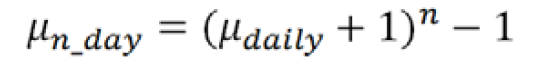

Based on daily returns, we have the following general formulas for VaR with a
confidence level to estimate an n-day VaR:
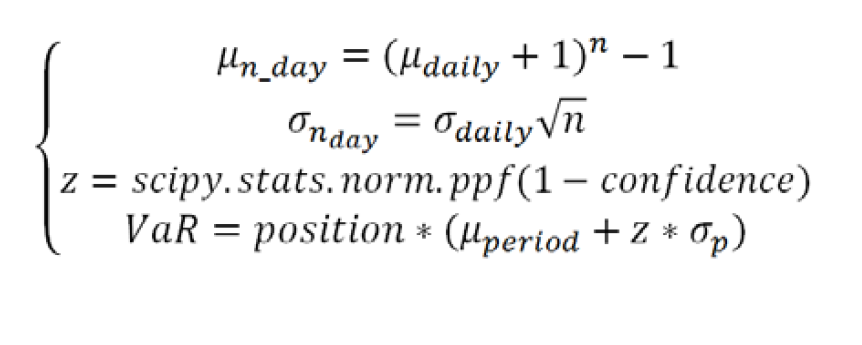

The following code shows the VaR for holding 50 shares of Wal-Mart stocks, on the
last day of 2016, over a 10-day period with a confidence level of 99%:

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from matplotlib.finance import quotes_historical_yahoo_ochl as getData
ticker='WMT' # input 1
n_shares=50 # input 2
confidence_level=0.99 # input 3
n_days=10 # input 4
begdate=(2012,1,1) # input 5
enddate=(2016,12,31) # input 6
z=norm.ppf(confidence_level)
x=getData(ticker,begdate,enddate,asobject=True,adjusted=True)
ret = x.aclose[1:]/x.aclose[:-1]-1
position=n_shares*x.close[0]
VaR=position*z*np.std(ret)*np.sqrt(n_days)
print("Holding=",position, "VaR=", round(VaR,4), "in ", n_days,"Days")

# Skewness and kurtosis
Based on the normality assumption, a VaR estimation considers only the first two
moments: mean and variance. If stock returns truly follow a normal distribution,
those two moments would fully define their probability distribution. From the
preceding sections, we know that this is not true. The first remedy is to include other
higher moments in addition to the first two moments. The third and fourth moments
are called skewness and kurtosis. For a stock or portfolio with n returns, skewness is
estimated by the following formula:
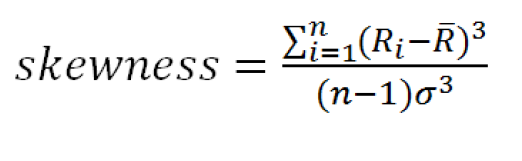

Here, skewness is the skewness, Ri is the ith return, is the mean return, n is the
number of returns, and σ is the standard deviation of returns. The kurtosis reflects
the impact of extreme values because a power of 4 is very high. The kurtosis is
usually estimated by the following formula is:
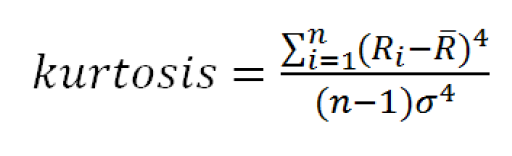

For a standard moral distribution, it has a zero mean, unit variance, zero skewness,
and its kurtosis is 3. Because of this, sometimes kurtosis is defined as the preceding
equation minus 3:
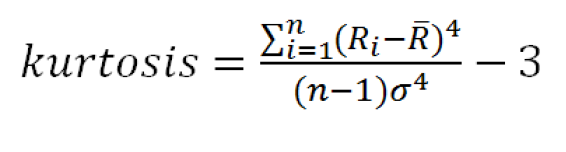

Some textbooks distinguish those two definitions as kurtosis and excess kurtosis.
However, others simply label the preceding formula as kurtosis as well. Thus, when
we conduct a test to see whether the kurtosis of a time series is zero, we have to
know which benchmark is used. The following program generates 5 million random
numbers from a standard deviation and applies four functions to estimate those four
moments, that is, mean, standard deviation, skewness, and kurtosis:

In [20]:
from scipy import stats,random
import numpy as np
np.random.seed(12345)
n=99999
#
ret = random.normal(0,1,n)
print('mean =', np.mean(ret))
print('std =',np.std(ret))
print('skewness=',stats.skew(ret))
print('kurtosis=',stats.kurtosis(ret))

mean = -0.0009941131203325152
std = 1.0010693970397595
skewness= 0.005591036214522367
kurtosis= -0.002254076575020303


# Modified VaR
From the previous discussion, we know that based on the assumption, that stock
returns follow a normal distribution. Because of this, the skewness and kurtosis
of returns are both assumed to be zero. However, in the real world, skewness and
excess kurtosis of many stock returns are not zero. As a consequence, the modified
VaR was developed to utilize those four moments instead of just two; see the
following definition:
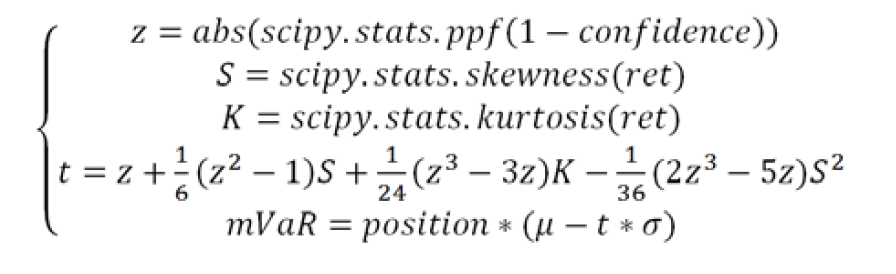

The following program offers two VaRs based
on the normality assumption and based on the preceding formula, that is, using all
four moments. The number of shares is 500 at the end of year 2016. The stock tested
is Walmart (WMT). The confidence level is 99% for a 1-day VaR:

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import stats,norm
from matplotlib.finance import quotes_historical_yahoo_ochl as getData
#
ticker='WMT' # input 1
n_shares=500 # input 2
confidence_level=0.99 # input 3
begdate=(2000,1,1) # input 4
enddate=(2016,12,31) # input 5
#
# Method I: based on the first two moments
z=abs(norm.ppf(1-confidence_level)) x=getData(ticker,begdate,enddate,asobject=True,adjusted=True)
ret = x.aclose[1:]/x.aclose[:-1]-1
position=n_shares*x.close[0]
mean=np.mean(ret)
std=np.std(ret)
VaR1=position*(mean-z*std)
print("Holding=",round(position,2), "VaR1=", round(VaR1,2), "for 1 day")
#
# Modified VaR: based on 4 moments
s=stats.skew(ret)
k=stats.kurtosis(ret)
t=z+1/6.*(z**2-1)*s+1/24.*(z**3-3*z)*k-1/36.*(2*z**3-5*z)*s**2
mVaR=position*(mean-t*std)
print("Holding=",round(position,2), "modified VaR=", round(mVaR,2),"for 1 day ")

# VaR based on sorted historical returns
We know that stock returns do not necessarily follow a normal distribution. An
alternative is to use sorted returns to evaluate a VaR. This method is called VaR
based on historical returns. Assume that we have a daily return vector called ret. We
sort it from the smallest to the highest. Let's call the sorted return vector sorted_ret.
For a given confidence level, the one-period VaR is given here:
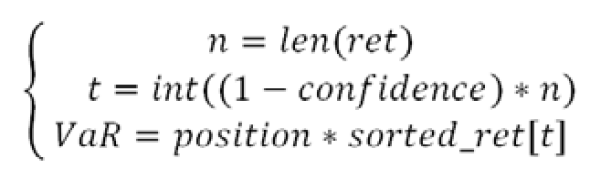

Here, position is our wealth (value of our portfolio), confidence is the confidence level and
n is the number of returns. The len() function shows the number of observations and
the int() function takes the integer part of an input value. For example, if the length of
the return vector is 200 and the confidence level is 99%, then the second value (200*0.01)
of the sorted returns, from the smallest to the highest, times our wealth, will be our VaR.
Obviously, if we have a longer time series, that is, more return observations, our final
VaR would be more accurate. For owning 500 shares of Walmart, what is the maximum
loss with a 99% confidence level the next day? First, let's look at several ways to sort our
data. The first one uses the numpy.sort() function:

In [21]:
import numpy as np
a = np.array([[1,-4],[9,10]])
b=np.sort(a)
print("a=",a)
print("b=",b)

a= [[ 1 -4]
 [ 9 10]]
b= [[-4  1]
 [ 9 10]]


In [22]:
import pandas as pd
a = pd.DataFrame([[9,4],[9,2],[1,-1]],columns=['A','B'])
print(a)
# sort by A ascedning, then B descending
b= a.sort_values(['A', 'B'], ascending=[1, 0])
print(b)
# sort by A and B, both ascedning
c= a.sort_values(['A', 'B'], ascending=[1, 1])
print(c)

   A  B
0  9  4
1  9  2
2  1 -1
   A  B
2  1 -1
0  9  4
1  9  2
   A  B
2  1 -1
1  9  2
0  9  4


For an easy comparison, those three datasets are put side by side. The left panel
shows the original dataset. The middle one shows the result sorted by column A first
in ascending order, then by column B in descending order. The right panel shows the
result sorted by columns A then B, both in ascending order:

# Simulation and VaR
In the previous sections, we have learned that there are two ways to estimate VaR for
an individual stock or for a portfolio. The first method depends on the assumption
that stock returns follow a normal distribution. The second one uses the sorted
historical returns. What is the link between those two methods? Actually, Monte
Carlo simulation could be served as a link. 